# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[student1@ulb.ac.be](mailto:student1@ulb.ac.be) - Student ID 123456__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData). For both these datasets, the dimensions and the head are printed in order to get a first feel of the data.

In [2]:
labels <- read.csv("training_set_labels.csv")
values <- read.csv("training_set_values.csv")

In [4]:
dim(labels)
head(labels)

[1] 59400     2

,id,status_group
,<int>,<chr>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


[1] 0

In [6]:
dim(values)
head(values)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,⋯,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,⋯,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,⋯,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


[1] 0

## Checking for missing values

We check if there are any missing values in the dataset. The results show that no empty values are present in either dataset.

In [7]:
sum(is.na(labels))
sum(is.na(values))

[1] 0

[1] 0

## Data exploration

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

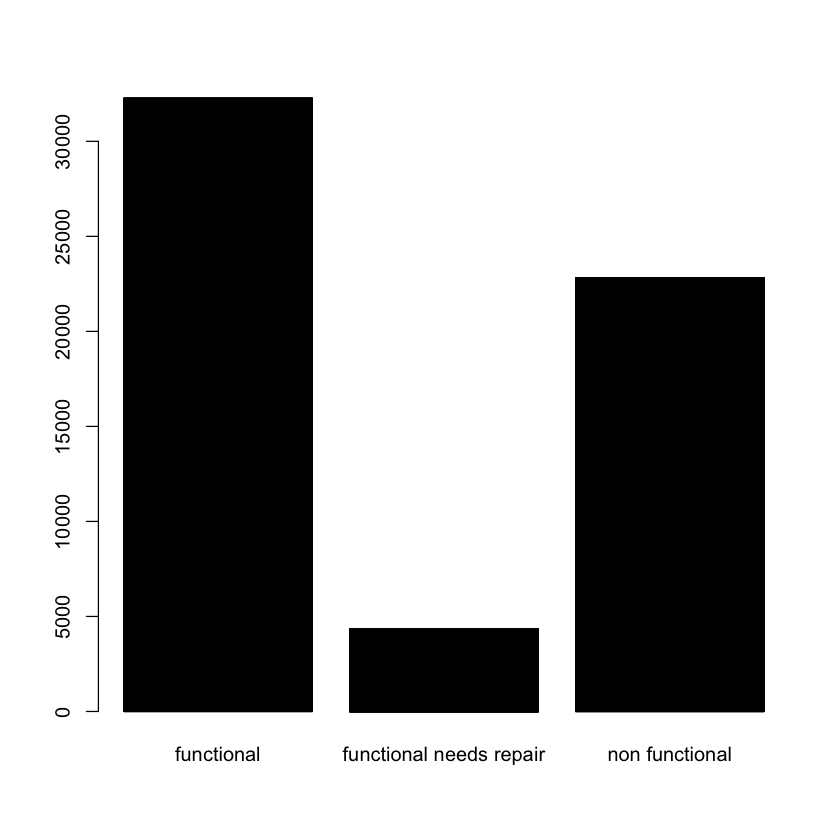

In [25]:
noquote(paste("Functional :",sum(labels$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(labels$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(labels$status_group=="non functional")))

barplot(table(labels))

# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection

# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions